# Query LLM to generate dataset

This is the code used to create our main datasets of LLM measurements.
The `load_dataset` function automatically downloads and preprocesses the `cpd_debates` if they were not yet.

In [1]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt



# local imports
from datasets.llm_measurements.query_llm import load_dataset, get_slice_metadata, get_speaker_slice_metadata, get_contextual_slice_measurements, get_contextual_speaker_measurements
from utils.network_utils import *



experiment_folder = 'datasets/llm_measurements/experiments'



# set OpenAI API key from file
with open('.key', 'r') as file:
    key = file.read().replace('\n', '')
    os.environ['OPENAI_API_KEY'] = key

In [2]:
# load the previous measurements
data = pd.read_pickle(f'{experiment_folder}/all_variables_150_slices_single_speaker_single_variable_candidates_only.pkl')

# throw out blacklisted values
blacklist = [col for col in data.columns if ('score' in col or 'impact' in col or 'pro' in col) and 'general score' not in col]
print(f'Removing {len(blacklist)} columns from the dataset: {blacklist}')
data = data.drop(blacklist, axis=1)
print(f'Loaded dataset with {len(data)} rows and {len(data.columns)} columns')

data.head()

Removing 39 columns from the dataset: ['tone is professional (tone)', 'language appropriateness (language appropriateness)', 'academic score (argue)', 'academic score (argument)', 'academic score (structure)', 'election score (voting)', 'election score (election)', 'US election score (argue)', 'US election score (argument)', 'US election score (voting)', 'US election score (election)', 'society score (reach)', 'pro democratic (argument)', 'pro republican (argument)', 'pro neutral (argument)', 'pro democratic (benefit)', 'pro republican (benefit)', 'pro neutral (benefit)', 'impact on audience (impact)', 'positive impact on audience (impact)', 'impact on economy (impact)', 'positive impact on economy (impact)', 'impact on society (impact)', 'positive impact on society (impact)', 'impact on environment (impact)', 'positive impact on environment (impact)', 'impact on politics (impact)', 'positive impact on politics (impact)', 'impact on rich population (impact)', 'positive impact on rich p

,slice_id,speaker,content quality (filler),content quality (speaker),content quality (dataset),topic predictiveness (usefullness),num_tokens,num_parts,slice_size,egotistical (benefit),...,speaker_electoral_votes,speaker_electoral_votes_ratio,speaker_popular_votes,speaker_popular_votes_ratio,speaker_won_election,speaker_is_president_candidate,speaker_is_vice_president_candidate,speaker_is_candidate,speaker_party_IS_DEMOCRAT,speaker_party_IS_REPUBLICAN
0,di0-ss2500_so0.1_co0.05_si2,BARACK OBAMA,0.8,0.8,0.8,1.0,2468,18,2500,0.5,...,332,0.6171,62600000,0.51438,1,1,0,1,1.0,0.0
1,di0-ss2500_so0.1_co0.05_si2,MITT ROMNEY,0.8,0.8,0.8,1.0,2468,18,2500,0.8,...,206,0.3829,59100000,0.48562,0,1,0,1,0.0,1.0
3,di0-ss2500_so0.1_co0.05_si6,BARACK OBAMA,0.8,0.8,0.8,0.8,2297,23,2500,0.5,...,332,0.6171,62600000,0.51438,1,1,0,1,1.0,0.0
4,di0-ss2500_so0.1_co0.05_si6,MITT ROMNEY,0.8,0.8,0.8,0.8,2297,23,2500,0.8,...,206,0.3829,59100000,0.48562,0,1,0,1,0.0,1.0
6,di0-ss2500_so0.1_co0.05_si7,BARACK OBAMA,1.0,0.8,1.0,1.0,2414,15,2500,0.5,...,332,0.6171,62600000,0.51438,1,1,0,1,1.0,0.0


In [3]:
data_averaged = pd.read_pickle(f'{experiment_folder}/all_variables_150_slices_single_speaker_single_variable_candidates_only_averaged.pkl')

# throw out blacklisted values
blacklist = [col for col in data_averaged.columns if ('score' in col or 'impact' in col or 'pro' in col) and 'general score' not in col]
print(f'Removing {len(blacklist)} columns from the dataset: {blacklist}')
data_averaged = data_averaged.drop(blacklist, axis=1)
print(f'Loaded dataset with {len(data_averaged)} rows and {len(data_averaged.columns)} columns')

data_averaged.head()

Removing 30 columns from the dataset: ['tone is professional', 'language appropriateness', 'academic score', 'election score', 'US election score', 'society score', 'pro democratic', 'pro republican', 'pro neutral', 'impact on audience', 'positive impact on audience', 'impact on economy', 'positive impact on economy', 'impact on society', 'positive impact on society', 'impact on environment', 'positive impact on environment', 'impact on politics', 'positive impact on politics', 'impact on rich population', 'positive impact on rich population', 'impact on poor population', 'positive impact on poor population', 'positive impact on USA', 'positive impact on army funding', 'positive impact on China', 'positive impact on Russia', 'positive impact on Western Europe', 'positive impact on World', 'positive impact on Middle East']
Loaded dataset with 292 rows and 68 columns


,slice_id,speaker,num_tokens,num_parts,slice_size,speaker_quantitative_contribution,speaker_quantitative_contribution_ratio,speaker_num_parts,speaker_num_parts_ratio,speaker_electoral_votes,...,civil discourse,respect for diverse opinions,preparation,resonance,authenticity,empathy,innovation,outreach,logical,general score
0,di0-ss2500_so0.1_co0.05_si2,BARACK OBAMA,2468,18,2500,807,0.326985,4,0.222222,332,...,0.8,0.8,0.9,0.8,0.8,0.8,0.5,0.783333,0.9,0.800
1,di0-ss2500_so0.1_co0.05_si2,MITT ROMNEY,2468,18,2500,1352,0.547812,6,0.333333,206,...,0.5,0.8,0.8,0.7,0.8,0.5,0.5,0.733333,0.8,0.775
3,di0-ss2500_so0.1_co0.05_si6,BARACK OBAMA,2297,23,2500,979,0.426208,4,0.173913,332,...,0.5,0.5,1.0,0.8,0.8,0.8,0.5,0.766667,0.8,0.800
4,di0-ss2500_so0.1_co0.05_si6,MITT ROMNEY,2297,23,2500,872,0.379626,9,0.391304,206,...,0.5,0.5,0.8,0.7,0.8,0.5,0.5,0.716667,0.8,0.725
6,di0-ss2500_so0.1_co0.05_si7,BARACK OBAMA,2414,15,2500,722,0.299089,4,0.266667,332,...,0.8,0.5,1.0,0.7,0.8,0.8,0.5,0.733333,0.8,0.800


In [4]:
possible_pertubation_columns = ['egotistical (benefit)', 'persuasiveness (convincing)', 'clarity (understandable)', 'clarity (easiness)', 'clarity (clarity)', 'contribution (quality)', 'contribution (quantity)', 'truthfulness (thruthullness)', 'bias (bias)', 'manipulation (manipulation)', 'manipulation (underhanded)', 'evasiveness (avoid)', 'evasiveness (ignore)', 'evasiveness (dodge)', 'evasiveness (evade)', 'relevant (relevant)', 'relevance (relevance)', 'conciseness (efficiency)', 'conciseness (concise)', 'use of evidence (evidence)', 'emotional appeal (emotional)', 'objectivity (unbiased)', 'sensationalism (exaggerated)', 'controversiality (controversial)', 'coherence (coherent)', 'consistency (consistent)', 'factuality (factual)', 'completeness (complete)', 'quality of sources (reliable)', 'balance (balanced)', 'tone is conversational (tone)', 'tone is academic (tone)', 'accessibility (accessibility)', 'engagement (engagement)', 'adherence to rules (adherence)', 'respectfulness (respectfulness)', 'interruptions (interruptions)', 'time management (time management)', 'responsiveness (responsiveness)', 'decorum (decorum)', 'venue respect (venue respect)', 'contextual awareness (contextual awareness)', 'confidence (confidence)', 'fair play (fair play)', 'listening skills (listening skills)', 'civil discourse (civil discourse)', 'respect for diverse opinions (respect for diverse opinions)', 'preparation (preparation)', 'resonance (resonance)', 'authenticity (authenticity)', 'empathy (empathy)', 'innovation (innovation)', 'outreach (penetration)', 'outreach (relatability)', 'outreach (accessibility)', 'outreach (amplification)', 'outreach (cultural relevance)', 'outreach (resonance)', 'logical (logic argument)', 'logical (sound)', 'general score (argue)', 'general score (argument)', 'general score (quality)', 'general score (voting)']
print(f'Pertubation columns ({len(possible_pertubation_columns)}): {possible_pertubation_columns}')
possible_pertubation_columns_averaged = list(set([col.split(' (')[0] for col in possible_pertubation_columns]))
print(f'Pertubation columns averaged ({len(possible_pertubation_columns_averaged)}): {possible_pertubation_columns_averaged}')

# # for now just keep a random subset for tests
n_observables = 11
random.seed(42)
pertubation_columns = random.sample(possible_pertubation_columns, 5) # sadly already paid for these => keep them even though sampling method for n>= 5 does not necessarily include all previous
while len(pertubation_columns) < 9:
    new_column = random.choice(possible_pertubation_columns)
    if new_column in pertubation_columns:
        continue
    pertubation_columns.append(new_column)
pertubation_columns = ['general score (argue)'] + pertubation_columns
# keep the ones that are there already, but for the next only take ones that have different names (not just different detailed names)
while len(pertubation_columns) < n_observables:
    new_column = random.choice([col for col in possible_pertubation_columns if col not in pertubation_columns])
    if new_column in pertubation_columns:
        continue
    names = [col.split(' (')[0] for col in pertubation_columns]
    if new_column.split(' (')[0] in names:
        continue
    pertubation_columns.append(new_column)

# # quick test with removing columns with several occurences for same name
# names = []
# _petubation_columns = []
# for col in pertubation_columns:
#     name = col.split(' (')[0]
#     if name in names:
#         continue
#     names.append(name)
#     _petubation_columns.append(col)
# pertubation_columns = _petubation_columns
    
pertubation_columns = ['general score (argue)', 'clarity (easiness)', 'respectfulness (respectfulness)', 'tone is academic (tone)', 'quality of sources (reliable)', 'conciseness (efficiency)', 'evasiveness (avoid)', 'outreach (accessibility)', 'persuasiveness (convincing)']
# pertubation_columns = ['general score (argue)', 'clarity (easiness)', 'respectfulness (respectfulness)', 'tone is academic (tone)', 'quality of sources (reliable)', 'conciseness (efficiency)', 'outreach (accessibility)', 'persuasiveness (convincing)']


print(f'Pertubation columns ({len(pertubation_columns)}): {pertubation_columns}')

pertubation_data = data.copy()[['speaker', 'slice_id'] + pertubation_columns]
pertubation_data.head()

Pertubation columns (64): ['egotistical (benefit)', 'persuasiveness (convincing)', 'clarity (understandable)', 'clarity (easiness)', 'clarity (clarity)', 'contribution (quality)', 'contribution (quantity)', 'truthfulness (thruthullness)', 'bias (bias)', 'manipulation (manipulation)', 'manipulation (underhanded)', 'evasiveness (avoid)', 'evasiveness (ignore)', 'evasiveness (dodge)', 'evasiveness (evade)', 'relevant (relevant)', 'relevance (relevance)', 'conciseness (efficiency)', 'conciseness (concise)', 'use of evidence (evidence)', 'emotional appeal (emotional)', 'objectivity (unbiased)', 'sensationalism (exaggerated)', 'controversiality (controversial)', 'coherence (coherent)', 'consistency (consistent)', 'factuality (factual)', 'completeness (complete)', 'quality of sources (reliable)', 'balance (balanced)', 'tone is conversational (tone)', 'tone is academic (tone)', 'accessibility (accessibility)', 'engagement (engagement)', 'adherence to rules (adherence)', 'respectfulness (respec

,speaker,slice_id,general score (argue),clarity (easiness),respectfulness (respectfulness),tone is academic (tone),quality of sources (reliable),conciseness (efficiency),evasiveness (avoid),outreach (accessibility),persuasiveness (convincing)
0,BARACK OBAMA,di0-ss2500_so0.1_co0.05_si2,0.8,0.9,0.9,0.3,0.8,0.8,0.2,0.8,0.8
1,MITT ROMNEY,di0-ss2500_so0.1_co0.05_si2,0.8,0.8,0.8,0.5,0.5,0.8,0.2,0.8,0.7
3,BARACK OBAMA,di0-ss2500_so0.1_co0.05_si6,0.8,0.8,0.8,0.0,0.5,0.8,0.2,0.8,0.8
4,MITT ROMNEY,di0-ss2500_so0.1_co0.05_si6,0.7,0.8,0.8,0.5,0.5,0.8,0.2,0.8,0.7
6,BARACK OBAMA,di0-ss2500_so0.1_co0.05_si7,0.8,0.9,0.8,0.0,0.5,0.8,0.2,0.8,0.8


In [5]:
# load ADN data for comparison
corr_possible_cols = data[possible_pertubation_columns].corr()
corr_possible_cols_averaged = data_averaged[possible_pertubation_columns_averaged].corr()
corr_pertubation_cols = data[pertubation_columns].corr()

# TODO: replace with combined for ADNs to work properly

# for graphs further down also switch from detailed names to short names
corr_pertubation_cols.columns = [col.split(' (')[0] for col in corr_pertubation_cols.columns]
corr_pertubation_cols.index = [col.split(' (')[0] for col in corr_pertubation_cols.index]
# rename general score to score
corr_pertubation_cols = corr_pertubation_cols.rename(columns={'general score': 'score'}, index={'general score': 'score'})
# rename outreach to outreach US
corr_pertubation_cols = corr_pertubation_cols.rename(columns={'outreach': 'outreach US'}, index={'outreach': 'outreach US'})

corr_possible_cols_averaged = corr_possible_cols_averaged.rename(columns={'general score': 'score'}, index={'general score': 'score'})
corr_possible_cols_averaged = corr_possible_cols_averaged.rename(columns={'outreach': 'outreach US'}, index={'outreach': 'outreach US'})

dis_matrix_adn_complete, _, _ = compute_distance_matrix_from_df(corr_possible_cols)
dis_matrix_adn_complete_averaged, _, _ = compute_distance_matrix_from_df(corr_possible_cols_averaged)
dis_matrix_adn_pertubation_cols, _, _ = compute_distance_matrix_from_df(corr_pertubation_cols)
dis_matrix_adn_pertubation_cols_computed_using_complete = dis_matrix_adn_complete.loc[pertubation_columns, pertubation_columns]

# same renames as above
dis_matrix_adn_pertubation_cols_computed_using_complete.columns = [col.split(' (')[0] for col in dis_matrix_adn_pertubation_cols_computed_using_complete.columns]
dis_matrix_adn_pertubation_cols_computed_using_complete.index = [col.split(' (')[0] for col in dis_matrix_adn_pertubation_cols_computed_using_complete.index]
# rename general score to score
dis_matrix_adn_pertubation_cols_computed_using_complete = dis_matrix_adn_pertubation_cols_computed_using_complete.rename(columns={'general score': 'score'}, index={'general score': 'score'})
# rename outreach to outreach US
dis_matrix_adn_pertubation_cols_computed_using_complete = dis_matrix_adn_pertubation_cols_computed_using_complete.rename(columns={'outreach': 'outreach US'}, index={'outreach': 'outreach US'})

## Run Experiments

In the following we prompt the LLM to get our measurements.
Since we cache the prompt response pairs you should be able to run this for free unless you modify something.

We take a subset of the measurements and then perturbe the input to check how it affects other values.
So given that it perceived variable `A` as `0.8` and `B` as `0.5` in an isolated setting, we want to check what it predicts for `B` if it thinks that it perceived `A` as f.e. `0.7`.

In [6]:
from datasets.llm_measurements.query_llm import load_chatbot, load_paragraphs, slices_to_single_slice_variable_prompt, slices_and_speakers_to_single_speaker_variable_prompt, slices_and_speakers_to_multi_speaker_variable_multi_speaker_prompt, slices_and_speaker_to_multi_speaker_variable_prompt, slice_and_speaker_to_pertubation_single_speaker_observable_prompt, run_experiment



# create chatbot (GPT-3.5-turbo from OpenAI)
bot = load_chatbot(output_file_suffix='pertubation')

debates_d, slices_d, paragraphs_d = load_dataset() # loads the preprocessed dataset of cpd debates
print(f'Loaded:\n\tDebates: {len(debates_d)}\n\tSlices: {len(slices_d)}\n\tParagraphs: {len(paragraphs_d)}')

Loaded:
	Debates: 47
	Slices: 419
	Paragraphs: 8836


In [7]:
from datasets.llm_measurements.observables import slice_variables, speaker_variables, multi_speaker_variables_groups



# define parameters
experiment_name = 'variables_test_subset_pertubations_50_slices'
possible_speakers = list(pertubation_data['speaker'].unique())
# possible_speakers = all presidential candidates
num_entries = 50

entries = [entry for entry in pertubation_data.iterrows()]

print(f'Loaded {len(entries)} entries')

# only taking subset of entries at random
random.seed(42)
random.shuffle(entries)
entries = entries[:num_entries]

print(f'Looking at subset:\n\tEntries: {len(entries)} with {len(pertubation_columns)} pertubation columns')


# slice_ids = list(pertubation_data['slice_id'].unique())
# slices = [slices_d[slice_id] for slice_id in slice_ids]
# print(f'Loaded {len(slices)} slices')

# only taking subset of paragraphs at random
# random.seed(42)
# random.shuffle(slices)
# slices = slices[:num_slices]

# print(f'Looking at subset:\n\tSlices: {len(slices)}')

print("\n\n\nWHOLE SLICE, SINGLE SPEAKER, SINGLE [SPEAKER OBSERVABLE] EXPERIMENT")
pertubations = [-0.1, 0.0, 0.1]
prompts = []
for index, row in entries:
    speaker = row['speaker']
    slice_id = row['slice_id']
    slice = slices_d[slice_id]

    for given_variable_name in pertubation_columns:
        real_given_value = row[given_variable_name]
        
        for variable_name in pertubation_columns:
            if variable_name == given_variable_name:
                continue

            given_variable = speaker_variables[given_variable_name]
            variable = speaker_variables[variable_name]

            original_output_value = row[variable_name]

            for pertubation in pertubations:
                perturbed_value = real_given_value + pertubation

                if perturbed_value < 0 or perturbed_value > 1:
                    continue

                prompt = slice_and_speaker_to_pertubation_single_speaker_observable_prompt(slice, speaker, variable, given_variable, real_given_value, pertubation, original_output_value)
                prompts.append(prompt)

print(f'Generated {len(prompts)} prompts')

# # print first prompt
# print(prompts[0].get_prompt())


prompts = prompts
P_SS_SSO_measurements = await run_experiment(bot, prompts)

# add metadata to measurements
metadata = {
    'is_slice_variable': False,
    'is_measured_variable': True,
    'is_pertubation': True,
}
P_SS_SSO_measurements = [{**m, **metadata} for m in P_SS_SSO_measurements]

Loaded 292 entries
Looking at subset:
	Entries: 50 with 9 pertubation columns



WHOLE SLICE, SINGLE SPEAKER, SINGLE [SPEAKER OBSERVABLE] EXPERIMENT
Generated 10592 prompts
Running 10592 prompts.

Batch 1/6

Batch 2/6

Batch 3/6

Batch 4/6

Batch 5/6

Batch 6/6

Bot cost:
[Info] Spent $0.000 for 0 tokens (in: 0, out: 0) and 0 requests. Throughput: 0.0 tokens/s and 0.0 requests/second.


In [8]:
print(f'Got {len(P_SS_SSO_measurements)} measurements for {len(prompts)} prompts => {len(P_SS_SSO_measurements) / len(prompts) * 100:.2f}% of measurements were successful')

Got 10592 measurements for 10592 prompts => 100.00% of measurements were successful


In [9]:
P_SS_SSO_measurements[0]

{'slice_id': 'di21-ss2500_so0.1_co0.05_si0',
 'prompt_type': 'Perturbed_SpeakerVariable_SingleSpeaker_Prompt',
 'speaker': 'RONALD REAGAN',
 'datatype': 'float',
 'detailed_name': 'clarity (easiness)',
 'name': 'clarity',
 'description': "How easy are the speaker's arguments to understand for a general audience?",
 'given_name': 'score',
 'given_detailed_name': 'general score (argue)',
 'real_value': 0.8,
 'pertubation': -0.1,
 'perturbed_value': 0.7000000000000001,
 'original_output_value': 0.8,
 'value': 0.8,
 'is_slice_variable': False,
 'is_measured_variable': True,
 'is_pertubation': True}

In [10]:
pertubation_df = pd.DataFrame(P_SS_SSO_measurements)
pertubation_df.head()

,slice_id,prompt_type,speaker,datatype,detailed_name,name,description,given_name,given_detailed_name,real_value,pertubation,perturbed_value,original_output_value,value,is_slice_variable,is_measured_variable,is_pertubation
0,di21-ss2500_so0.1_co0.05_si0,Perturbed_SpeakerVariable_SingleSpeaker_Prompt,RONALD REAGAN,float,clarity (easiness),clarity,How easy are the speaker's arguments to unders...,score,general score (argue),0.8,-0.1,0.7,0.8,0.8,False,True,True
1,di21-ss2500_so0.1_co0.05_si0,Perturbed_SpeakerVariable_SingleSpeaker_Prompt,RONALD REAGAN,float,clarity (easiness),clarity,How easy are the speaker's arguments to unders...,score,general score (argue),0.8,0.0,0.8,0.8,0.9,False,True,True
2,di21-ss2500_so0.1_co0.05_si0,Perturbed_SpeakerVariable_SingleSpeaker_Prompt,RONALD REAGAN,float,clarity (easiness),clarity,How easy are the speaker's arguments to unders...,score,general score (argue),0.8,0.1,0.9,0.8,0.8,False,True,True
3,di21-ss2500_so0.1_co0.05_si0,Perturbed_SpeakerVariable_SingleSpeaker_Prompt,RONALD REAGAN,float,respectfulness (respectfulness),respectfulness,Does the speaker show respect to others involv...,score,general score (argue),0.8,-0.1,0.7,0.8,0.8,False,True,True
4,di21-ss2500_so0.1_co0.05_si0,Perturbed_SpeakerVariable_SingleSpeaker_Prompt,RONALD REAGAN,float,respectfulness (respectfulness),respectfulness,Does the speaker show respect to others involv...,score,general score (argue),0.8,0.0,0.8,0.8,0.9,False,True,True


In [11]:
# for each successfull measurement we add the original value to the data
# store the change for each pertubation and each connection in a matrix of vectors

# source -> target -> [{org_output_value: ..., perturbed_values: ...}]
pertubation_arrays = {}
# for source in pertubation_columns:
#     pertubation_arrays[source] = {}
#     for target in pertubation_columns:
#         pertubation_arrays[source][target] = []

# TODO: actually average over them instead of just counting them several times...
# for (speaker, slice_id, given_detailed_name, detailed_name), measurements in pertubation_df.groupby(['speaker', 'slice_id', 'given_detailed_name', 'detailed_name']):
    # assert(len(measurements) <= len(pertubations))

for (speaker, slice_id, given_name, name), measurements in pertubation_df.groupby(['speaker', 'slice_id', 'given_name', 'name']):

    pertubation_to_measurement = {}
    for pertubation in pertubations:
        pertubation_to_measurement[pertubation] = None
    for _, measurement in measurements.iterrows():
        pertubation = measurement['pertubation']
        pertubation_to_measurement[pertubation] = measurement['value']
    
    # pertubation_arrays[given_detailed_name][detailed_name].append({
    #     'original_output_value': measurements.iloc[0]['original_output_value'],
    #     'pertubed_values': pertubation_to_measurement,
    # })
    
    if given_name not in pertubation_arrays:
        pertubation_arrays[given_name] = {}
    if name not in pertubation_arrays[given_name]:
        pertubation_arrays[given_name][name] = []
    pertubation_arrays[given_name][name].append({
        'original_output_value': measurements.iloc[0]['original_output_value'],
        'pertubed_values': pertubation_to_measurement,
    })

# TODO: this is just an uggly quick fix
pertubation_columns = list(pertubation_arrays.keys())

In [12]:
# create matrix of RMSE values for each pertubation
pertubation_rmse = {}
pertubation_mean = {}
pertubation_twice_corrected_rmse = {} # subtracting the new output for 0.0 pertubation instead of the original value
pertubation_twice_corrected_mean = {}
# combining the positive and negative pertubations
pertubation_pos_minus_neg_combined_rmse = pd.DataFrame(np.zeros((len(pertubation_columns), len(pertubation_columns))), columns=pertubation_columns, index=pertubation_columns, dtype=float)
pertubation_pos_minus_neg_combined_mean = pd.DataFrame(np.zeros((len(pertubation_columns), len(pertubation_columns))), columns=pertubation_columns, index=pertubation_columns, dtype=float)

for pertubation in pertubation_df['pertubation'].unique():
    pertubation_rmse[pertubation] = pd.DataFrame(np.zeros((len(pertubation_columns), len(pertubation_columns))), columns=pertubation_columns, index=pertubation_columns, dtype=float)
    pertubation_mean[pertubation] = pd.DataFrame(np.zeros((len(pertubation_columns), len(pertubation_columns))), columns=pertubation_columns, index=pertubation_columns, dtype=float)
    pertubation_twice_corrected_rmse[pertubation] = pd.DataFrame(np.zeros((len(pertubation_columns), len(pertubation_columns))), columns=pertubation_columns, index=pertubation_columns, dtype=float)
    pertubation_twice_corrected_mean[pertubation] = pd.DataFrame(np.zeros((len(pertubation_columns), len(pertubation_columns))), columns=pertubation_columns, index=pertubation_columns, dtype=float)

for source in pertubation_columns:
    for target in pertubation_columns:
        if source == target:
            continue
        
        direct_values = {p: [] for p in pertubations}
        twice_corrected_values = {p: [] for p in pertubations}
        pos_minus_neg_combined_values = []

        for measurement in pertubation_arrays[source][target]:
            original_output_value = measurement['original_output_value']
            pertubed_values = measurement['pertubed_values']

            pos_value = pertubed_values[0.1]
            neg_value = pertubed_values[-0.1]
            neutral_value = pertubed_values[0.0]

            if neutral_value is None:
                continue
            direct_values[0.0].append(neutral_value - original_output_value)

            if pos_value is not None:
                direct_values[0.1].append(pos_value - original_output_value)
                twice_corrected_values[0.1].append(pos_value - neutral_value)
            
            if neg_value is not None:
                direct_values[-0.1].append(neg_value - original_output_value)
                twice_corrected_values[-0.1].append(neg_value - neutral_value)
            
            if pos_value is not None and neg_value is not None:
                pos_minus_neg_combined_values.append(pos_value - neg_value)

        for pertubation, values in direct_values.items():
            if len(values) == 0:
                continue
            pertubation_rmse[pertubation].loc[source, target] = np.sqrt(np.mean(np.array(values)**2))
            pertubation_mean[pertubation].loc[source, target] = np.mean(np.array(values))
        
        for pertubation, values in twice_corrected_values.items():
            if len(values) == 0:
                continue
            pertubation_twice_corrected_rmse[pertubation].loc[source, target] = np.sqrt(np.mean(np.array(values)**2))
            pertubation_twice_corrected_mean[pertubation].loc[source, target] = np.mean(np.array(values))
        
        # # set all > 0 to 1 and all < 0 to -1 and all 0 to 0
        # pos_minus_neg_combined_values = [1 if v > 0 else -1 if v < 0 else 0 for v in pos_minus_neg_combined_values]

        if len(pos_minus_neg_combined_values) > 0:
            pertubation_pos_minus_neg_combined_rmse.loc[source, target] = np.sqrt(np.mean(np.array(pos_minus_neg_combined_values)**2))
            pertubation_pos_minus_neg_combined_mean.loc[source, target] = np.mean(np.array(pos_minus_neg_combined_values))


# print('RMSE and MeanE values for each pertubation')
# # round to 2 decimal places when printing and not in scientific notation
# np.set_printoptions(precision=2)
# np.set_printoptions(suppress=True)
# for pertubation in pertubation_df['pertubation'].unique():
#     print(f'Pertubation: {pertubation}')
#     print('RMSE')
#     print(pertubation_rmse[pertubation])
#     print('MeanE')
#     print(pertubation_mean[pertubation])
#     print()

<Axes: >

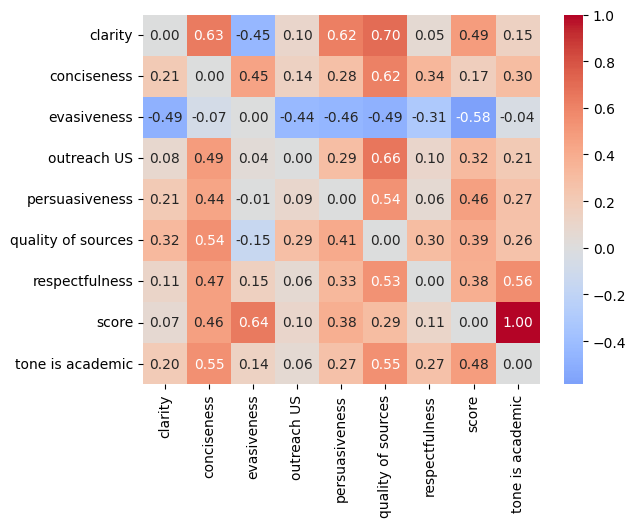

In [13]:
tmp = pertubation_pos_minus_neg_combined_mean
# tmp = pertubation_mean[0.0]
# tmp = pertubation_twice_corrected_mean[0.1] #- pertubation_twice_corrected_mean[-0.1]
# tmp = tmp - tmp.T
tmp = tmp / tmp.abs().max().max()
# print rounded to 2 decimal places
# tmp.round(2)
# set color scheeme to -1 = blue, 0 = white, 1 = red
sns.heatmap(tmp, annot=True, fmt=".2f", cmap='coolwarm', center=0)

<Axes: >

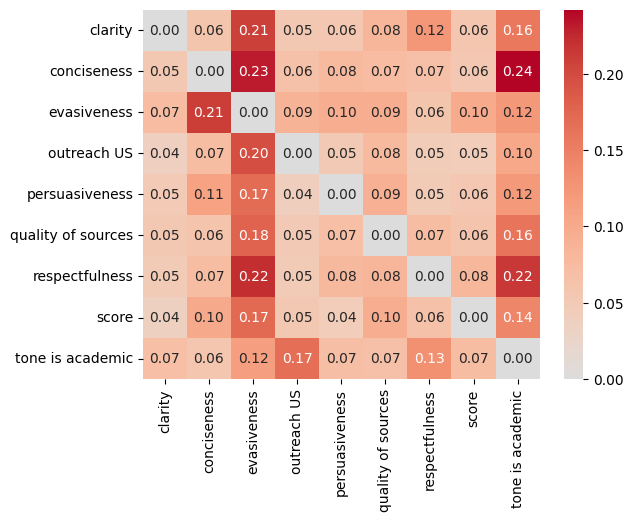

In [14]:
# plot std = sqrt(mean(x**2) - mean(x)**2) = sqrt(mean(x**2) - (mean(x))**2 = sqrt(sqrt(mean(x**2))**2 - (mean(x))**2)
tmp = (pertubation_pos_minus_neg_combined_rmse**2 - pertubation_pos_minus_neg_combined_mean**2).apply(np.sqrt)

sns.heatmap(tmp, annot=True, fmt=".2f", cmap='coolwarm', center=0)

<Axes: >

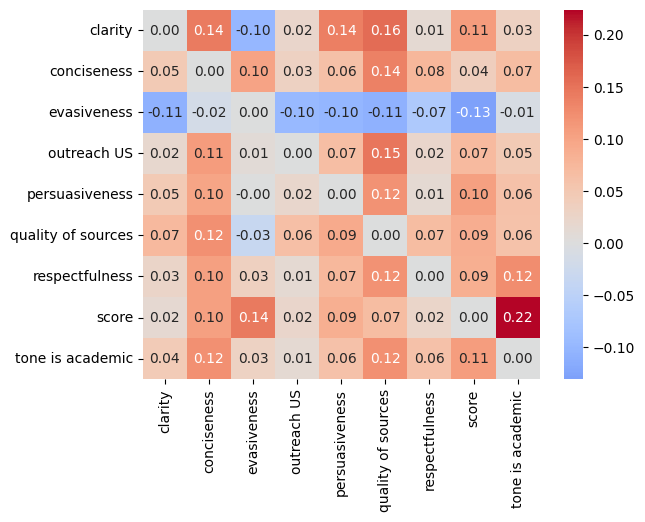

In [33]:
tmp = pertubation_pos_minus_neg_combined_mean
# tmp = pertubation_mean[0.0]
# tmp = pertubation_twice_corrected_mean[0.1] #- pertubation_twice_corrected_mean[-0.1]
# tmp = tmp - tmp.T
# tmp = tmp / tmp.abs().max().max()
# print rounded to 2 decimal places
# tmp.round(2)
# set color scheeme to -1 = blue, 0 = white, 1 = red
sns.heatmap(tmp, annot=True, fmt=".2f", cmap='coolwarm', center=0)

<Axes: >

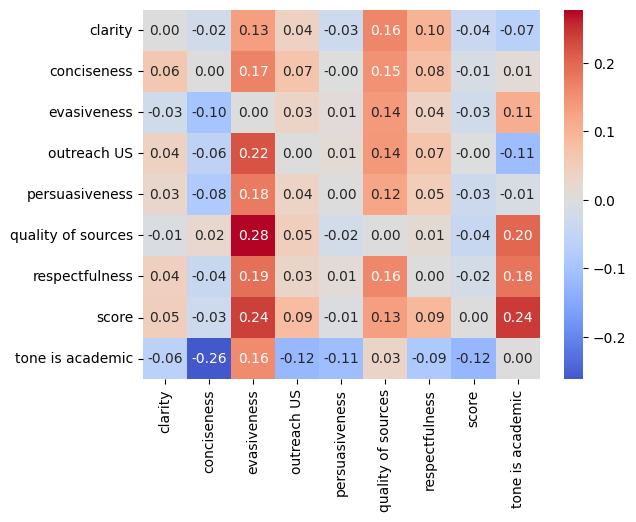

In [34]:
tmp = pertubation_mean[0.0]
# tmp = pertubation_mean[0.0]
# tmp = pertubation_twice_corrected_mean[0.1] #- pertubation_twice_corrected_mean[-0.1]
# tmp = tmp - tmp.T
# tmp = tmp / tmp.abs().max().max()
# print rounded to 2 decimal places
# tmp.round(2)
# set color scheeme to -1 = blue, 0 = white, 1 = red
sns.heatmap(tmp, annot=True, fmt=".2f", cmap='coolwarm', center=0)

<Axes: >

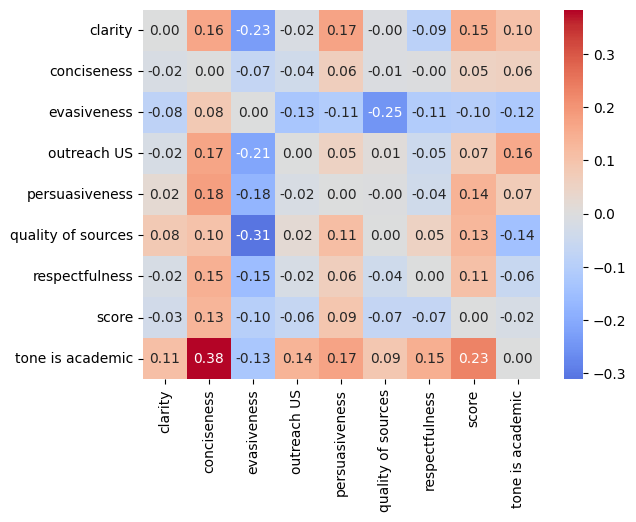

In [36]:
tmp = pertubation_pos_minus_neg_combined_mean - pertubation_mean[0.0]
# tmp = pertubation_mean[0.0]
# tmp = pertubation_twice_corrected_mean[0.1] #- pertubation_twice_corrected_mean[-0.1]
# tmp = tmp - tmp.T
# tmp = tmp / tmp.abs().max().max()
# print rounded to 2 decimal places
# tmp.round(2)
# set color scheeme to -1 = blue, 0 = white, 1 = red
sns.heatmap(tmp, annot=True, fmt=".2f", cmap='coolwarm', center=0)

In [39]:
tmp = pertubation_pos_minus_neg_combined_mean - pertubation_mean[0.0]
dm = DistanceMatrix(tmp.abs())
dm.keep_top_n_links(30)
dm.to_go_figure()

In [42]:
tmp = pertubation_pos_minus_neg_combined_rmse
dm = DistanceMatrix(tmp.abs())
dm.keep_top_n_links(30)
dm.to_go_figure()

In [41]:
tmp = pertubation_mean[0.0]
dm = DistanceMatrix(tmp.abs())
dm.keep_top_n_links(30)
dm.to_go_figure()

In [17]:
pertubation_rmse[0.0].head()

,clarity,conciseness,evasiveness,outreach US,persuasiveness,quality of sources,respectfulness,score,tone is academic
clarity,0.000000,0.121655,0.230651,0.115758,0.074833,0.189209,0.146969,0.074833,0.222261
conciseness,0.083666,0.000000,0.259230,0.142127,0.088318,0.184391,0.148324,0.088318,0.227596
evasiveness,0.073485,0.186011,0.000000,0.143527,0.050990,0.181659,0.109545,0.076158,0.288791
outreach US,0.088318,0.124097,0.287054,0.000000,0.082462,0.178885,0.133417,0.083666,0.232809
persuasiveness,0.070711,0.142829,0.248193,0.113137,0.000000,0.165529,0.134164,0.100995,0.202978


In [18]:
pertubation_rmse[0.1].head()

,clarity,conciseness,evasiveness,outreach US,persuasiveness,quality of sources,respectfulness,score,tone is academic
clarity,0.000000,0.138505,0.239898,0.106904,0.086897,0.268404,0.134771,0.065465,0.229907
conciseness,0.056569,0.000000,0.401248,0.105830,0.069282,0.254951,0.136382,0.044721,0.292575
evasiveness,0.129615,0.248998,0.000000,0.121655,0.113137,0.147648,0.116619,0.152315,0.274591
outreach US,0.047380,0.118666,0.299319,0.000000,0.078246,0.259906,0.101015,0.051508,0.225877
persuasiveness,0.052915,0.106771,0.284956,0.095917,0.000000,0.233238,0.101980,0.056569,0.216333


In [19]:
pertubation_rmse[-0.1].head()

,clarity,conciseness,evasiveness,outreach US,persuasiveness,quality of sources,respectfulness,score,tone is academic
clarity,0.000000,0.139284,0.231948,0.082462,0.098995,0.126491,0.124900,0.086023,0.244540
conciseness,0.067823,0.000000,0.230217,0.097980,0.073485,0.123288,0.106771,0.054772,0.215407
evasiveness,0.065465,0.271241,0.000000,0.101183,0.053452,0.227826,0.133631,0.055635,0.221467
outreach US,0.078740,0.137840,0.250200,0.000000,0.069282,0.127279,0.087178,0.072111,0.241247
persuasiveness,0.092736,0.160000,0.237065,0.097980,0.000000,0.149666,0.106771,0.107703,0.185472


<Axes: title={'center': 'Influence of pertubations on general score (argue)'}, xlabel='Perturbed Variable', ylabel='Measurement Type'>

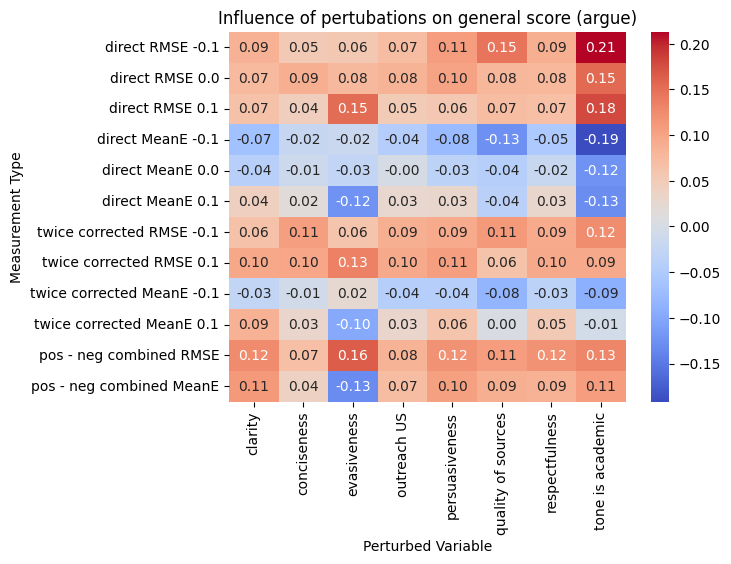

In [28]:
# make a heatplot where the y-axis is the kind of pertubation and the x-axis is the influence of the variable on 'general score'
target = 'score'

pertubation_columns_without_target = [col for col in pertubation_columns if col != target]

values = []
for pertubation in pertubations:
    values.append((
        f'direct RMSE {pertubation}',
        pertubation_rmse[pertubation].loc[pertubation_columns_without_target,target].values,
    ))

for pertubation in pertubations:
    values.append((
        f'direct MeanE {pertubation}',
        # pertubation_mean[pertubation][target].values,
        pertubation_mean[pertubation].loc[pertubation_columns_without_target,target].values,
    ))

for pertubation in pertubations:
    if pertubation == 0.0:
        continue
    values.append((
        f'twice corrected RMSE {pertubation}',
        # pertubation_twice_corrected_rmse[pertubation][target].values,
        pertubation_twice_corrected_rmse[pertubation].loc[pertubation_columns_without_target,target].values,
    ))
for pertubation in pertubations:
    if pertubation == 0.0:
        continue
    values.append((
        f'twice corrected MeanE {pertubation}',
        # pertubation_twice_corrected_mean[pertubation][target].values,
        pertubation_twice_corrected_mean[pertubation].loc[pertubation_columns_without_target,target].values,
    ))

values.append((
    'pos - neg combined RMSE',
    # pertubation_pos_minus_neg_combined_rmse[target].values,
    pertubation_pos_minus_neg_combined_rmse.loc[pertubation_columns_without_target,target].values,
))
values.append((
    'pos - neg combined MeanE',
    # pertubation_pos_minus_neg_combined_mean[target].values,
    pertubation_pos_minus_neg_combined_mean.loc[pertubation_columns_without_target,target].values,
))

heatplot_matrix = pd.DataFrame([v[1] for v in values], index=[v[0] for v in values], columns=pertubation_columns_without_target)
# drop the target 
# heatplot_matrix = heatplot_matrix.drop(target, axis=1)

fig = sns.heatmap(heatplot_matrix, annot=True, fmt=".2f", cmap='coolwarm')
fig.set_title('Influence of pertubations on general score (argue)')
fig.set_xlabel('Perturbed Variable')
fig.set_ylabel('Measurement Type')
fig

In [29]:
pertubation_mean[0.0].loc[target, pertubation_columns_without_target]

clarity               0.048
conciseness          -0.030
evasiveness           0.240
outreach US           0.086
persuasiveness       -0.006
quality of sources    0.132
respectfulness        0.092
tone is academic      0.244
Name: score, dtype: float64

('Correlation', array([ 0.77973557,  0.543162  , -0.64940182,  1.        ,  0.95530571,
        0.30492787,  0.692786  ,  0.3761843 ]))
('ADN', array([0.61844864, 0.646234  , 0.62817858, 0.60557767, 1.        ,
       0.48521048, 0.54136005, 0.63283947]))
('Pos - Neg\nPertubation', array([ 0.84155844,  0.29018182, -1.        ,  0.54545455,  0.79418182,
        0.672     ,  0.65227273,  0.82727273]))


<Axes: xlabel='Attribute', ylabel='Measurement Type'>

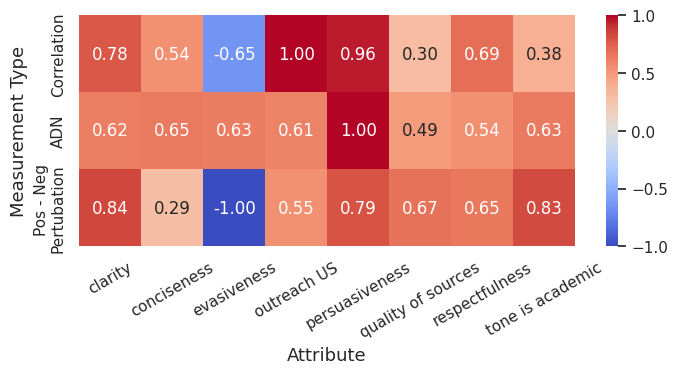

In [71]:
# paper plot
target = 'score'
# target_detailed = 'general score (argue)'

# correlation measures
# corr_influences = data.corr().loc[target,pertubation_columns]
# adn_influences = dis_matrix_adn_complete.loc[target, pertubation_columns]

# pos_neg_pertubation_influences = pertubation_pos_minus_neg_combined_mean[target].values
# definition_pertubation_influences = pertubation_mean[0.0][target].values

pertubation_columns_without_target = [col for col in pertubation_columns if col != target]

values = [
    ('Correlation', corr_possible_cols_averaged.loc[pertubation_columns_without_target,target].values),
    ('ADN', dis_matrix_adn_complete_averaged.loc[pertubation_columns_without_target,target].values),
    # ('RMSE[Pos - Neg]', pertubation_pos_minus_neg_combined_rmse.loc[pertubation_columns_without_target,target].values),
    # ('RMSE[Definition]', pertubation_rmse[0.0].loc[pertubation_columns_without_target,target].values),
    ('Pos - Neg\nPertubation', pertubation_pos_minus_neg_combined_mean.loc[pertubation_columns_without_target,target].values),
    # ('Definition', pertubation_mean[0.0].loc[pertubation_columns_without_target,target].values),
]



# normalize the values so that max(abs(values)) = 1
for i in range(len(values)):
    values[i] = (values[i][0], values[i][1] / np.max(np.abs(values[i][1])))
    print(values[i])


heatplot_matrix = pd.DataFrame([v[1] for v in values], index=[v[0] for v in values], columns=pertubation_columns_without_target)
# drop the target 
# heatplot_matrix = heatplot_matrix.drop(target, axis=1)

f, ax = plt.subplots(figsize=(8, 3))
sns.set(font_scale=1.)
fig = sns.heatmap(heatplot_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
# fig.set_title('Influence of pertubations on general score (argue) (score for ADN)')
fig.set_xlabel('Attribute', fontsize=13)
fig.set_ylabel('Measurement Type', fontsize=13)
# x tick label sizes
plt.xticks(fontsize=11)
# y tick label sizes
plt.yticks(fontsize=11)

# rotate ticks
plt.xticks(rotation=30)
fig

In [22]:
n_connections = 10

dis_matrices = [
    ('ADN computed using all possible pertubation cols', dis_matrix_adn_complete),
    ('ADN of pertubation cols but computed using all possible pertubation cols', dis_matrix_adn_pertubation_cols_computed_using_complete),
    ('ADN computed using only pertubation cols', dis_matrix_adn_pertubation_cols),
    ('Sqrt(Mean(Squared(Pertubation pos - neg combined)))', pertubation_pos_minus_neg_combined_rmse),
    # ('Mean(Pertubation pos - neg combined)', pertubation_pos_minus_neg_combined_mean),
    # ('Abs(Mean(Pertubation pos - neg combined))', pertubation_pos_minus_neg_combined_mean.abs()),
    ('Sqrt(Mean(Squared(Pertubation 0. - Original Value))', pertubation_rmse[0.0]),
    # ('Mean(Pertubation 0. - Original Value)', pertubation_mean[0.0]),
    # ('Abs(Mean(Pertubation 0. - Original Value))', pertubation_mean[0.0].abs()),
]

for name, dis_matrix in dis_matrices:
    dm = DistanceMatrix(dis_matrix)
    dm.keep_top_n_links(n_connections)
    fig = dm.to_go_figure()
    # set title
    fig.update_layout(title=name)
    # plt.title(name)
    fig.show()

In [23]:
# now we turn this into a distance matrix and plot it
# make all entries positive

dis_matrix = DistanceMatrix(pertubation_rmse[0.].abs()) #, source='evasiveness')
# dis_matrix.update_outgoing_colors('evasiveness', (0, 1, 0, 1))
dis_matrix.keep_top_n_links(n_connections)
dis_matrix.to_go_figure()

# dis_matrix_preprocessed = dis_matrix_top_n_links(pertubation_rmse[0.].abs(), n_connections)
# preprocessed_dis_matrix_to_go_figure(dis_matrix_preprocessed, 'RMSE', n_connections, source=None)

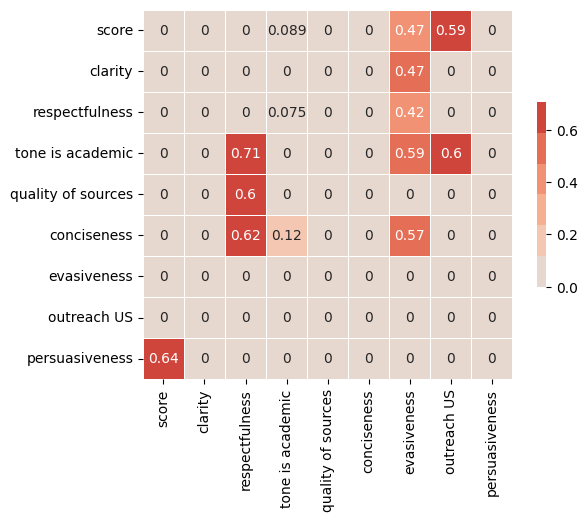

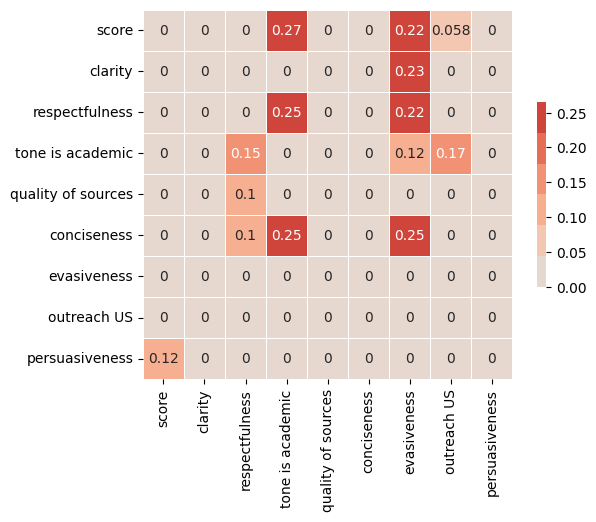

In [24]:
def combined_dis_matrix_plot(dis_matrix_A, dis_matrix_B):
    color_link_a = 'rgba(0, 0, 255, 0.3)'
    color_link_b = 'rgba(255, 0, 0, 0.3)'
    color_node_a = 'rgba(0, 0, 255, 0.8)'
    color_node_b = 'rgba(255, 0, 0, 0.8)'

    # normalize the values, so that np.sum(dis_matrix_A.values) == np.sum(dis_matrix_B.values)
    dis_matrix_A = dis_matrix_A / np.sum(dis_matrix_A.values) * np.sum(dis_matrix_B.values)

    nodes_a = list(dis_matrix_A.columns)
    nodes_b = list(dis_matrix_B.columns)
    nodes = nodes_a + nodes_b
    node_colors = [color_node_a] * len(nodes_a) + [color_node_b] * len(nodes_b)

    edges_a = [(source, target, dis_matrix_A.iloc[source, target]) for source in range(len(nodes_a)) for target in range(len(nodes_a)) if source != target]
    edges_b = [(source, target, dis_matrix_B.iloc[source, target]) for source in range(len(nodes_b)) for target in range(len(nodes_b)) if source != target]
    edges = edges_a + edges_b
    edge_colors = [color_link_a] * len(edges_a) + [color_link_b] * len(edges_b)


    fig = go.Figure(
        go.Sankey(
            arrangement='freeform',
            node=dict(
                label=nodes,
                color=node_colors,
                pad=10  
            ),
            link=dict(
                arrowlen=15,
                source=[l[0] for l in edges],
                target=[l[1] for l in edges],
                value=[l[2] for l in edges],
                color=edge_colors,
            ),
        ),
    )

    return fig

n_connections = 7

# dis_matrix_A = dis_matrix_adn_pertubation_cols
dis_matrix_A = dis_matrix_adn_pertubation_cols_computed_using_complete.copy()
# dis_matrix_B = pertubation_rmse[0.].copy()
dis_matrix_B = pertubation_pos_minus_neg_combined_rmse.copy()

# Order the columns and rows in the same way
dis_matrix_B = dis_matrix_B[dis_matrix_A.columns]
dis_matrix_B = dis_matrix_B.reindex(dis_matrix_A.index)

dm_A = DistanceMatrix(dis_matrix_A)
dm_A.keep_top_n_links(n_connections)

dm_B = DistanceMatrix(dis_matrix_B)
dm_B.keep_top_n_links(n_connections)

assert((dm_A.dis_matrix.columns == dm_B.dis_matrix.columns).all())
assert((dm_A.dis_matrix.index == dm_B.dis_matrix.index).all())

# now make it so that we show the values of the other as well, even if not included in the top n
combined_connections = dm_A.dis_matrix + dm_B.dis_matrix

dm_c_A = DistanceMatrix(dis_matrix_A.copy().where(combined_connections > 0, 0))
dm_c_A.to_sns_heatmap()
plt.show()
dm_c_A.remove_negative_values()

dm_c_B = DistanceMatrix(dis_matrix_B.copy().where(combined_connections > 0, 0))
dm_c_B.to_sns_heatmap()
plt.show()
dm_c_B.remove_negative_values()

fig = combined_dis_matrix_plot(dm_c_A.dis_matrix, dm_c_B.dis_matrix)
fig

# dis_matrix_B = DistanceMatrix(pertubation_rmse[0.].where(common_connections > 0, 0))
# dis_matrix_B.keep_top_n_links(n_connections)

# fig = combined_dis_matrix_plot(dis_matrix_A.dis_matrix, dis_matrix_B.dis_matrix)
# fig

<Axes: >

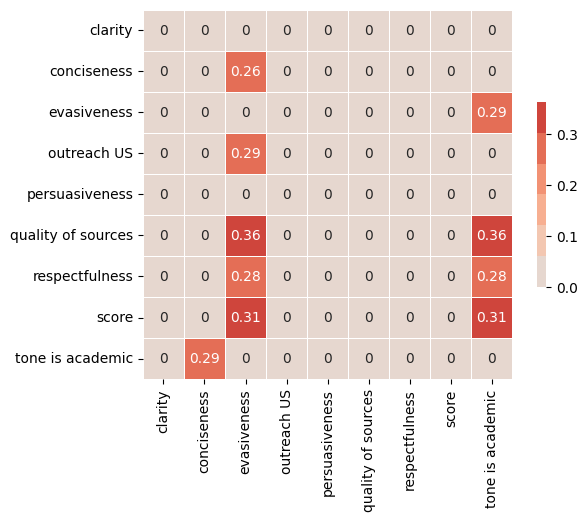

In [25]:
dis_matrix.to_sns_heatmap()

In [26]:
dis_matrix_to_go_figure(pertubation_pos_minus_neg_combined_rmse.T, 'RMSE', n_connections, source=None)

NameError: name 'dis_matrix_to_go_figure' is not defined

In [ ]:
dis_matrix_to_go_figure(pertubation_twice_corrected_rmse[0.1].T, 'twice corrected', n_connections, source=None)

In [ ]:
dis_matrix_to_go_figure(pertubation_twice_corrected_rmse[-0.1].T, 'twice corrected', n_connections, source=None)